### Sea-ice volume fluxes in the Beaufort Sea region for all experiments

#### Author: Jonathan Rheinlænder*
#### Date: Jun. 02 2022
#### Affiliation: Nansen Environmental and Remote Sensing Center, Bergen, Norway
*jonathan.rheinlaender@nersc.no

In [2]:
%matplotlib inline
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
import struct
import xarray as xr
from datetime import datetime
import matplotlib as mpl
import sys
import os
import datetime as dt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pynextsim.projection_info as projection_info 
import matplotlib.dates as mdates
import pandas as pd
import get_volumeflux

In [4]:
def make_figure(wi, hi, nrow,ncol):

    fig = plt.figure(figsize=(wi,hi))
    #plt.subplots_adjust(hspace=5, wspace=0.01, top=0.95, bottom=0.1, left=0.075, right=0.925)
    gs = gridspec.GridSpec(nrow,ncol)
    
    return fig, gs 


In [5]:
# load data

rootdir = '/home/rheinlender/shared-simstore-ns9829k/'
inpath = rootdir + 'home/rheinlender/data/nextsim-output/breakup2013/start_20130213_nudging/'
outpath_plots =  rootdir + 'home/rheinlender/figs/breakup-paper/'

#expts = ["expt_01_wrf10/outputs/", "expt_02_wrf20/outputs/","expt_03_wrf40/outputs/","expt_04_wrf80/outputs/", 
#         "expt_01_wrf10-nodyn/outputs/", "expt_01_wrf10/outputs-cair*0.25", "expt_01_wrf10/outputs-cair*0.5"]
#expts_names = ["wrf10", "wrf20","wrf40","wrf80", 'no_motion', 'cair*0.25',  'cair*0.5']

expts = ["expt_01_wrf10/outputs/", 
         "expt_02_wrf20/outputs/",
         "expt_03_wrf40/outputs/",
         "expt_04_wrf80/outputs/", 
         "expt_05_wrf10-sitx0.5/outputs/",
         "expt_06_wrf10-sitx1.5/outputs/", 
         "expt_07_wrf10-sitx2.0/outputs/",
         "expt_01_wrf10-nodyn/outputs/",
        ]
expts_names = ["wrf10", "wrf20","wrf40","wrf80", "SIT*0.5", "SIT*1.5", "SIT*2.0", "no_motion"]

files = [os.path.join(inpath, f, 'Moorings.nc') for f in expts]

saving... /home/rheinlender/shared-simstore-ns9829k/home/rheinlender/figs/breakup-paper/iceflux_beaufort_all-expts.png


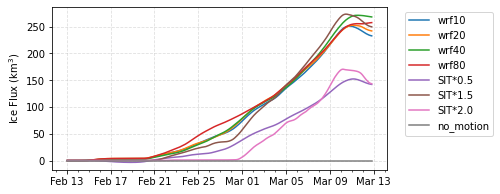

In [9]:

# create dataframe
df = pd.DataFrame(columns=['name', 'Total ice flux (km3)'])

# subset region: Beaufort Sea
x0=0; x1=260
y0=150; y1=410
bbox =  (y0, y1, x0, x1)

fig, ax = plt.subplots(1,1, figsize = (6,3))

for i, fl in enumerate(files):
    ds = xr.open_dataset(fl)

    time = ds['time'].time.values.astype('datetime64[ms]').astype('O')

    # get fluxes 
    iceflux = get_volumeflux.get_vol_fluxes(ds, ds['sit'], bbox, res=5e3)

    # calculate total ice flux
    dt = 3*(60*60) # 3hrs in sec
    total_iceflux = 1e-9 * np.sum(iceflux*dt)    
    
    # APPEND TO DATAFRAME
    df.loc[i] = [expts_names[i], 
                 total_iceflux.round(decimals=1)]
    
    
    cumflux = np.cumsum(iceflux*dt)*1e-9 # cumulative sum in km3

    ax.plot(time, cumflux, label=expts_names[i])

ax.set_ylabel('Ice Flux (km$^3$)')
days = mdates.DayLocator()  # every day
dtFmt = mdates.DateFormatter('%b %d') # define the formatting     
ax.xaxis.set_major_formatter(dtFmt)
ax.xaxis.set_minor_locator(days)
ax.grid(linestyle='--', alpha=0.4)
ax.legend(loc='upper left', bbox_to_anchor=(1.04,1))

# save figure
figname = os.path.join(outpath_plots,
      '%s%s' % (outpath_plots, 'iceflux_beaufort_all-expts.png'))
print("saving...", figname)
fig.savefig(figname, dpi=300, bbox_inches='tight')


# Show table

In [10]:
df

,name,Total ice flux (km3)
0,wrf10,232.8
1,wrf20,242.0
2,wrf40,268.2
3,wrf80,257.6
4,SIT*0.5,142.1
5,SIT*1.5,249.8
6,SIT*2.0,143.3
7,no_motion,0.0
